# Import:

In [10]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.applications import MobileNet, MobileNetV2, MobileNetV3Large, VGG16, ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# DAta augmentation using geometric transformation:

In [ ]:
# from tensorflow.keras.preprocessing import image
# from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array

# # Path to the directory containing the original images
# train_dir = r'E:\subhajit\DataSet\project\dataset\HR_Scab_Patch'

# # Path to the directory where augmented images will be saved
# save_dir = r'E:\subhajit\DataSet\project\aug\HR_Scab_Patch'

# # Number of images you want after augmentation
# desired_num_images = 250

# # Create ImageDataGenerator instance for augmentation
# datagen = ImageDataGenerator(
#     rotation_range=45,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# # Iterate over each image in the original directory and generate augmented images
# for root, dirs, files in os.walk(train_dir):
#     for file in files:
#         # Load image and convert it to numpy array
#         img = load_img(os.path.join(root, file))
#         x = img_to_array(img)
#         x = np.expand_dims(x, axis=0)

#         # Generate augmented images
#         i = 0
#         for batch in datagen.flow(x, batch_size=1, save_to_dir=save_dir, save_prefix=file.split('.')[0], save_format='jpeg'):
#             i += 1
#             if i >= (desired_num_images // len(files)):
#                 break  # break the loop if we've reached desired_num_images

# print(f"Augmentation completed. Total images: {len(os.listdir(save_dir))}")

# Dataset:

In [11]:
mydir = r'D:\Course\Mtech- CS\SummerProject&Desartation\Geometric_augmented_dataset(7-class)'
categories = ['CR_Embedded_Scab','CR_Rolled_in_Scale','CR_SCALE_RIS','CR_Sliver_NMI','HR_Scab_Patch','HR_Sliver_NMI','HR_Sliver_Slab_Stage']

# Labeling the Dataset:
1. Gathering the data of all classes and stored into a list called 'data'
2. Labeling the data into its correspoding classes as: 
    'CR_Embedded_scab' --> 0, 
    'CR_Rolled_in_Scale' ---> 1, 
    'CR_SCALE_RIS' ---> 2, 
    'CR_Sliver_NMI' ---> 3, 
    'HR_Scab_Patch' ---> 4, 
    'HR_Sliver_NMI' ---> 5, 
    'HR_Sliver_Slab_Stage' ---> 6

In [12]:
# Load data
data = []
for label, category in enumerate(categories):
    folder_path = os.path.join(mydir, category)
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (512, 512))

        data.append([img , label])


# Shuffle:

In [13]:
random.shuffle(data)

# Separate features (x) and labels (y):

In [14]:
x = np.array([entry[0] for entry in data])
y = np.array([entry[1] for entry in data])

# normalizing the data:

In [15]:
x = x.astype('float32')/255

cheaking x and its shape

In [15]:
print(x.shape)
print(y.shape)
# print(x)

(780, 512, 512, 3)
(780,)


# Split data into train and test sets:

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(624, 512, 512, 3)
(156, 512, 512, 3)
(624,)
(156,)


# Display some images:

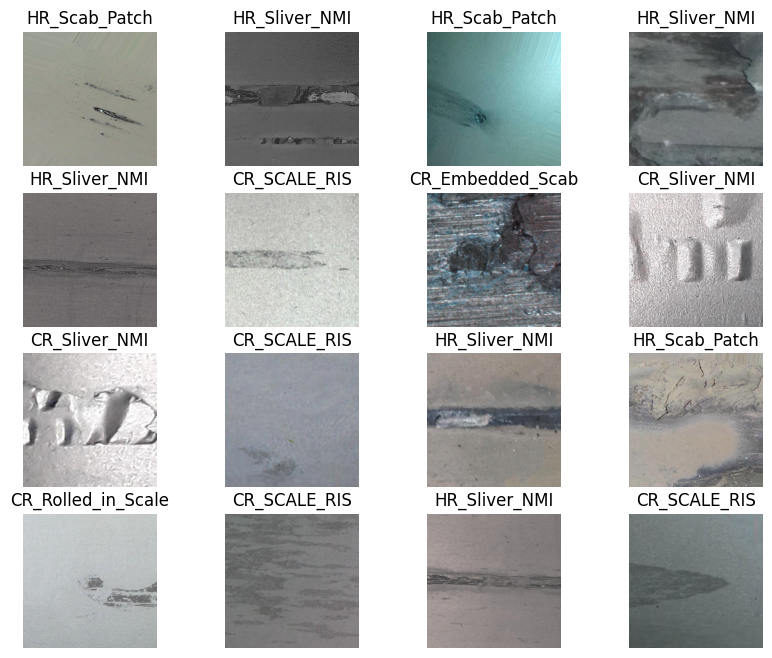

In [20]:
fig, axes = plt.subplots(ncols=4, nrows=4, sharex=True, sharey=False, figsize=(10, 8))

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i in range(16):
    axes[i].set_title(categories[int(y_train[i])])
    axes[i].imshow(x_train[i])
    axes[i].axis('off')

# Define a function to build and compile different Models:

In [22]:
def build_model(base_model):
    base_model.trainable = False  # Freeze the base model
    inputs = tf.keras.Input(shape=(512, 512, 3))
    x = base_model(inputs, training=False)
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    outputs = Dense(len(categories), activation='softmax')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# def create_mobilenetv1_model(input_shape, num_classes):
#     base_model = MobileNet(weights='imagenet', include_top=False)
#     input_layer = Input(shape=input_shape)
#     x = Conv2D(32, (3, 3), strides=(2, 2), padding='same', use_bias=False)(input_layer)
#     for layer in base_model.layers[2:]:
#         x = layer(x)
#     x = GlobalAveragePooling2D()(x)
#     output_layer = Dense(num_classes, activation='softmax')(x)
#     model = Model(inputs=input_layer, outputs=output_layer)
#     return model

In [ ]:
# def create_vgg16_model(input_shape, num_classes):
#     base_model = VGG16(weights='imagenet', include_top=False)
#     input_layer = Input(shape=input_shape)
#     x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
#     for layer in base_model.layers[2:]:
#         x = layer(x)
#     x = GlobalAveragePooling2D()(x)
#     output_layer = Dense(num_classes, activation='softmax')(x)
#     model = Model(inputs=input_layer, outputs=output_layer)
#     return model

In [ ]:
# def create_resnet50_model(input_shape, num_classes):
#     preprocessing_model = create_preprocessing_layer(input_shape)
#     base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(512, 512, 3))
#     input_layer = Input(shape=input_shape)
#     x = preprocessing_model(input_layer)
#     x = base_model(x)
#     x = GlobalAveragePooling2D()(x)
#     output_layer = Dense(num_classes, activation='softmax')(x)
#     model = Model(inputs=input_layer, outputs=output_layer)
#     return model

# List of models to compare:

In [23]:
models = {
    "MobileNetV1": build_model(MobileNet(weights='imagenet', include_top=False)),
    "MobileNetV2": build_model(MobileNetV2(weights='imagenet', include_top=False)),
    "MobileNetV3": build_model(MobileNetV3Large(weights='imagenet', include_top=False)),
    "VGG16": build_model(VGG16(weights='imagenet', include_top=False)),
    "ResNet50": build_model(ResNet50(weights='imagenet', include_top=False))
}

C:\Users\SUBHAJIT\AppData\Local\Temp\ipykernel_17432\303868368.py:3: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  "MobileNetV1": build_model(MobileNet(weights='imagenet', include_top=False)),


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


C:\Users\SUBHAJIT\AppData\Local\Temp\ipykernel_17432\303868368.py:4: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  "MobileNetV2": build_model(MobileNetV2(weights='imagenet', include_top=False)),


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


C:\Users\SUBHAJIT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\applications\mobilenet_v3.py:512: UserWarning: `input_shape` is undefined or non-square, or `rows` is not 224. Weights for input shape (224, 224) will be loaded as the default.
  return MobileNetV3(


12683000/12683000 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 39s 0us/step


# Summary of the models:

In [24]:
for name, model in models.items():
    model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 512, 512, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenet_1.00_224 (Functional) │ (None, 16, 16, 1024)   │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,410,567 (16.82 MB)

 Trainable params: 1,181,703 (4.51 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 512, 512, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 16, 16, 1280)   │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1024)           │     1,311,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,701,831 (14.12 MB)

 Trainable params: 1,443,847 (5.51 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 512, 512, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MobilenetV3large (Functional)   │ (None, 16, 16, 960)    │     2,996,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 960)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1024)           │       984,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,112,519 (15.69 MB)

 Trainable params: 1,116,167 (4.26 MB)

 Non-trainable params: 2,996,352 (11.43 MB)

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 512, 512, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 16, 16, 512)    │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,372,103 (58.64 MB)

 Trainable params: 657,415 (2.51 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 512, 512, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 16, 16, 2048)   │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,817,991 (98.49 MB)

 Trainable params: 2,230,279 (8.51 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

# Train and Evaluate each model:

In [25]:
histories = {}
results = {}
epochs = 30
batch_size = 32

for name, model in models.items():
    print(f"Training {name}...")
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test))
    
    # Store the history
    histories[name] = history
    
    print(f"Evaluating {name}...")
    results[name] = model.evaluate(x_test, y_test, batch_size=batch_size)
    
    y_pred = np.argmax(model.predict(x_test), axis=-1)
    
    # Convert y_test to label indices if one-hot encoded
    if y_test.ndim > 1 and y_test.shape[-1] > 1:
        y_true = np.argmax(y_test, axis=-1)
    else:
        y_true = y_test  # Already in label format
    
    report = classification_report(y_true, y_pred, target_names=categories)
    print(f"Classification Report for {name}:\n{report}")

Training MobileNetV1...
Epoch 1/2


: 

# Print the results:

In [ ]:
for name, result in results.items():
    print(f"{name} - Loss: {result[0]}, Accuracy: {result[1]}")

# plot the training history for each model:

In [ ]:
def plot_history(histories):
    # Create a figure with two rows and two columns of subplots
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    # Plot Accuracy
    for name, history in histories.items():
        if 'accuracy' in history.history:
            axes[0, 0].plot(history.history['accuracy'], label=name)
        else:
            print(f"Warning: 'accuracy' not found for model '{name}'. Available keys: {list(history.history.keys())}")

        if 'val_accuracy' in history.history:
            axes[0, 1].plot(history.history['val_accuracy'], label=name)
        else:
            print(f"Warning: 'val_accuracy' not found for model '{name}'. Available keys: {list(history.history.keys())}")

    # Plot Loss
    for name, history in histories.items():
        if 'loss' in history.history:
            axes[1, 0].plot(history.history['loss'], label=name)
        else:
            print(f"Warning: 'loss' not found for model '{name}'. Available keys: {list(history.history.keys())}")

        if 'val_loss' in history.history:
            axes[1, 1].plot(history.history['val_loss'], label=name)
        else:
            print(f"Warning: 'val_loss' not found for model '{name}'. Available keys: {list(history.history.keys())}")

    # Set titles and labels
    axes[0, 0].set_title('Training Accuracy')
    axes[0, 1].set_title('Validation Accuracy')
    axes[1, 0].set_title('Training Loss')
    axes[1, 1].set_title('Validation Loss')

    for ax in axes.flat:
        ax.set_xlabel('Epochs')
        ax.set_ylabel('Value')
        ax.legend()
    
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

# Call the plot_history function
plot_history(histories)
